# Розв'язання прямої та оберненої задач дифузії з використанням Python 3.7 та Jupyter Notebook
Залежність коефіцієнта дифузії для даної задачі наступна:
$$D(c) = 1\cdot 10^{-4} + 6 \cdot 10^{-4} c =4 \cdot 10^{-4} c^{2} $$

Будемо розв'язувати рівняння дифузії речовини згідно другого закону Фіка (одновимірний випадок): 

$$\frac{\partial c}{\partial t} = \frac{\partial}{\partial x}\bigg(D(c)\cdot\frac{\partial c}{\partial x}\bigg)$$

<IPython.core.display.Javascript object>


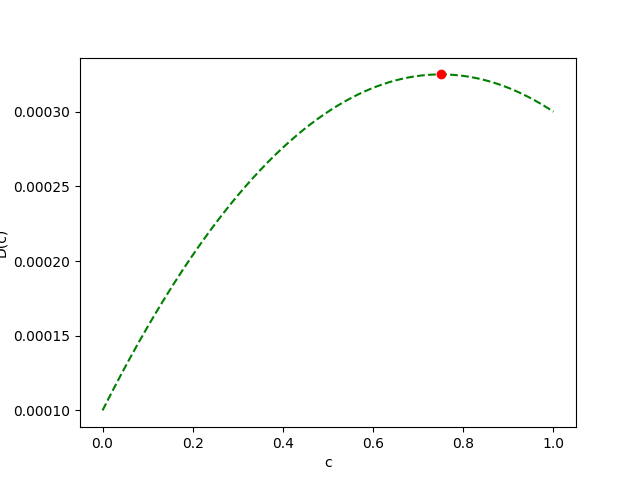

In [1]:
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt


# constants
NPOINTS = 1000


###########################

def vectorize(func):
    """
    Vectorize decorator for python functions
    """
    def wrapper(vector):
        fn = np.vectorize(func)
        return fn(vector)
    return wrapper

@vectorize
def Dc(c: float)->float:
    return 1e-4 + 6e-4*c - 4e-4*(c**2)


def plot_dc():
    c = np.linspace(0,1, NPOINTS)
    D = Dc(c)
    max_D_index = np.argmax(D) # Find the diffusion coefficient maxima index
    fig = plt.figure('Залежність коефіцієнта дифузії від концентрації')
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()
    ax.clear()
    ax.set_ylabel('D(c)')
    ax.set_xlabel('c')
    ax.plot(c,D,'g--', c[max_D_index], D[max_D_index], 'ro') # show on plot D(c) and maxima of D(c)
    fig.canvas.draw()
plot_dc()

<IPython.core.display.Javascript object>


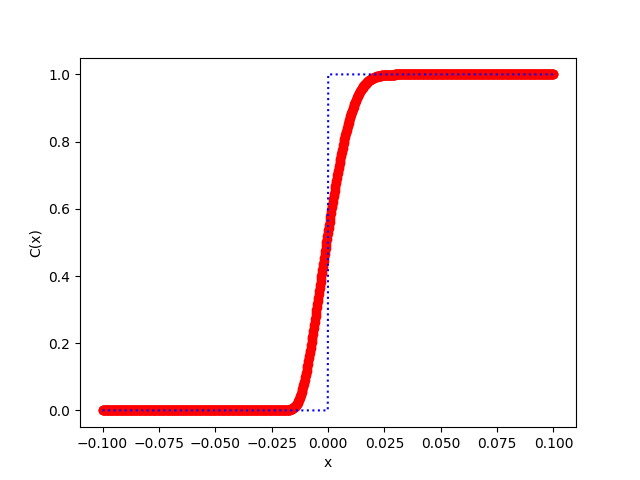

Solution completed


In [2]:
# constants for Diffusion PDE
LEFT_BOUND = -0.1
RIGHT_BOUND = 0.1



@vectorize
def initial_c(x):
    if x>0:
        return 1
    else:
        return 0
    
def get_max_D():
    c = np.linspace(0,1, NPOINTS)
    D = Dc(c)
    return np.max(D)

x = np.linspace(LEFT_BOUND,RIGHT_BOUND, NPOINTS) # set x vector

DX2 = (x[1]-x[0])**2 # set dx2
DX = x[1]-x[0]
# calculate dt
DT = (0.1*(DX**2))/get_max_D()

TMAX = 10000*DT # maximum T

koef = DT/DX2

t = 0

# initial condition
c = np.array(initial_c(x), dtype=np.float64) 
c_init = c.copy();
c_new = c.copy()


# setup plot area
fig = plt.figure('Профіль концентрації')
ax = fig.add_subplot(111)

plt.ion()
fig.show()
fig.canvas.draw()

# solution  of equation
while t < TMAX:
    c[0]=0
    c[NPOINTS-1]=1
    
    D = Dc(c)
    for j in range(1,NPOINTS-1):
        c_new[j] = c[j] + 0.5*koef*((D[j+1]+D[j])*(c[j+1]-c[j]) - (D[j-1]+D[j])*(c[j]-c[j-1]))
    
    c = c_new.copy()
    t+=DT
    
    # plot concentration profile
    if int(t/DT) % 100 ==0:
        ax.clear()
        ax.set_ylabel('С(x)')
        ax.set_xlabel('x')
        ax.plot(x,c, 'ro-',x,c_init,'b:')
        fig.canvas.draw()

# after calculation inform that complete
print('Solution completed')





<IPython.core.display.Javascript object>


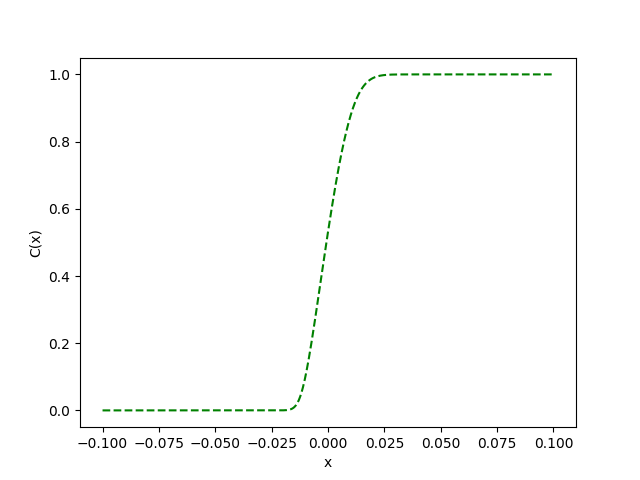

In [3]:
%matplotlib notebook
def plot_c_x(x,c):
    fig = plt.figure('Профіль концентрації')
    ax = fig.add_subplot(111)
    fig.show()
    ax.clear()
    ax.set_ylabel('С(x)')
    ax.set_xlabel('x')
    ax.plot(x,c,'g--') 
    fig.canvas.draw()
# check that we have correct concentration profile
plot_c_x(x,c)